In [1]:
#dealing with the data. cleaning the NaN values, duplicates and outliers.
#create a model to predict the price of second-handed cars
#create a model to predict that people with different budgets will buy which kind of car
#create plot to find out the relation between price and each factor.

In [145]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
from datetime import datetime
import pymysql
from sqlalchemy import create_engine
import getpass  
password = getpass.getpass()

········


In [147]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/autoscout'
engine = create_engine(connection_string)



In [148]:
# importing the data

In [149]:
data=pd.read_csv('autoscout24-germany-dataset.csv')

In [150]:
data.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011


In [151]:
data.shape

(46405, 9)

In [152]:
data.describe()

,mileage,price,hp,year
count,4.640500e+04,4.640500e+04,46376.000000,46405.000000
mean,7.117786e+04,1.657234e+04,132.990987,2016.012951
std,6.262531e+04,1.930470e+04,75.449284,3.155214
min,0.000000e+00,1.100000e+03,1.000000,2011.000000
25%,1.980000e+04,7.490000e+03,86.000000,2013.000000
50%,6.000000e+04,1.099900e+04,116.000000,2016.000000
75%,1.050000e+05,1.949000e+04,150.000000,2019.000000
max,1.111111e+06,1.199900e+06,850.000000,2021.000000


In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46405 entries, 0 to 46404
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    46405 non-null  int64  
 1   make       46405 non-null  object 
 2   model      46262 non-null  object 
 3   fuel       46405 non-null  object 
 4   gear       46223 non-null  object 
 5   offerType  46405 non-null  object 
 6   price      46405 non-null  int64  
 7   hp         46376 non-null  float64
 8   year       46405 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.2+ MB


In [154]:
data.dtypes

mileage        int64
make          object
model         object
fuel          object
gear          object
offerType     object
price          int64
hp           float64
year           int64
dtype: object

In [155]:
# renaming the header

In [156]:
data=data.rename(columns={'make':'manufacturer','offerType':'offer_type'})

In [157]:
#selecting all the second-handed cars

In [158]:
data['offer_type'].value_counts()

Used              40122
Pre-registered     2780
Demonstration      2368
Employee's car     1122
New                  13
Name: offer_type, dtype: int64

In [159]:
data=data[(data['offer_type']!='New')]

In [160]:
data.shape

(46392, 9)

In [161]:
# checking the NaN value

In [162]:
data.isna().sum()

mileage           0
manufacturer      0
model           143
fuel              0
gear            182
offer_type        0
price             0
hp               29
year              0
dtype: int64

In [163]:
#clearing the NaN value

In [164]:
data=data.drop('model',axis=1)

In [165]:
data.head()

,mileage,manufacturer,fuel,gear,offer_type,price,hp,year
0,235000,BMW,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,Gasoline,Manual,Used,6950,156.0,2011


In [166]:
# The data has more than 40000 rows and there are only 200 NaN values in this case. So i decide to drop them all.

In [167]:
data=data.dropna()

In [168]:
#clearing the duplicate

In [169]:
data=data.drop_duplicates(keep='first')

In [170]:
# creating a new column named age_of_car. It shows the number of years since the car was produced. 
# Because this data is collected in 2021 so i use 2021 instead of datetime.now().year.

In [171]:
data['age_of_car']=2021-data['year']

In [172]:
data.head()

,mileage,manufacturer,fuel,gear,offer_type,price,hp,year,age_of_car
0,235000,BMW,Diesel,Manual,Used,6800,116.0,2011,10
1,92800,Volkswagen,Gasoline,Manual,Used,6877,122.0,2011,10
2,149300,SEAT,Gasoline,Manual,Used,6900,160.0,2011,10
3,96200,Renault,Gasoline,Manual,Used,6950,110.0,2011,10
4,156000,Peugeot,Gasoline,Manual,Used,6950,156.0,2011,10


In [173]:
#creating another new column named place_of_origin to display which country these manufacturer belong to.

In [174]:
data['manufacturer'].unique()

array(['BMW', 'Volkswagen', 'SEAT', 'Renault', 'Peugeot', 'Toyota',
       'Opel', 'Mazda', 'Ford', 'Mercedes-Benz', 'Chevrolet', 'Audi',
       'Fiat', 'Kia', 'Dacia', 'MINI', 'Hyundai', 'Skoda', 'Citroen',
       'Infiniti', 'Suzuki', 'SsangYong', 'smart', 'Cupra', 'Volvo',
       'Jaguar', 'Porsche', 'Nissan', 'Honda', 'Mitsubishi', 'Others',
       'Lexus', 'Jeep', 'Maserati', 'Bentley', 'Land', 'Alfa', 'Subaru',
       'Dodge', 'Microcar', 'Lamborghini', 'Baic', 'Lada', 'Tesla',
       'Chrysler', '9ff', 'McLaren', 'Aston', 'Rolls-Royce', 'Lancia',
       'Abarth', 'DS', 'Daihatsu', 'Ligier', 'Ferrari', 'Caravans-Wohnm',
       'Aixam', 'Alpine', 'Zhidou', 'Morgan', 'Maybach', 'RAM', 'Iveco',
       'Alpina', 'Polestar', 'Brilliance', 'Piaggio', 'FISKER',
       'Cadillac', 'Isuzu', 'Corvette', 'DFSK', 'Estrima'], dtype=object)

In [175]:
Germany=['BMW','Volkswagen','Opel','Mercedes-Benz','Audi','MINI','smart','Porsche','Bentley','Land','9ff']
Europe=['SEAT','Renault','Peugeot','Fiat','Dacia','Skoda','Citroen','Cupra','Volvo','Jaguar','Maserati','Alfa','Microcar','Lamborghini','Lada','McLaren','Aston','Rolls-Royce','Lancia']
Japan=['Toyota','Mazda','Infiniti','Suzuki','Nissan','Honda','Mitsubishi','Lexus','Subaru']
America=['Ford','Chevrolet','Jeep','Dodge','Tesla','Chrysler']
Other=['Kia','Hyundai','SsangYong','Others','Baic','Abarth', 'DS', 'Daihatsu', 'Ligier', 'Ferrari', 'Caravans-Wohnm',
       'Aixam', 'Alpine', 'Zhidou', 'Morgan', 'Maybach', 'RAM', 'Iveco',
      'Alpina', 'Polestar', 'Brilliance', 'Piaggio', 'FISKER',
       'Cadillac', 'Isuzu', 'Corvette', 'DFSK', 'Estrima']

In [176]:
def classification(x):
    if x in Germany:
        y='Germany'
    elif x in Europe:
        y='Europe_others'
    elif x in Japan:
        y='Japan'
    elif x in America:
        y='America'
    else:
        y='Others'
    return y

In [177]:
data['place_of_origin']=data['manufacturer'].apply(classification)

In [179]:
data.to_sql("data_auto", engine, if_exists='fail', index_label=None, chunksize=None, dtype=None,
             method=None)

43997

In [38]:
data['place_of_origin'].value_counts()

Germany          20223
Europe_others    12662
America           4650
Japan             3578
Others            2884
Name: place_of_origin, dtype: int64

In [39]:
data['place_of_origin']=np.where(data['manufacturer'].isin(['BMW','Volkswagen','Opel','Mercedes-Benz','Audi','MINI','smart','Porsche','Bentley','Land','9ff']),data['place_of_origin'],'others')

In [40]:
data['place_of_origin'].value_counts()

others     23774
Germany    20223
Name: place_of_origin, dtype: int64

In [41]:
data.head()

,mileage,manufacturer,fuel,gear,offer_type,price,hp,year,age_of_car,place_of_origin
0,235000,BMW,Diesel,Manual,Used,6800,116.0,2011,10,Germany
1,92800,Volkswagen,Gasoline,Manual,Used,6877,122.0,2011,10,Germany
2,149300,SEAT,Gasoline,Manual,Used,6900,160.0,2011,10,others
3,96200,Renault,Gasoline,Manual,Used,6950,110.0,2011,10,others
4,156000,Peugeot,Gasoline,Manual,Used,6950,156.0,2011,10,others


In [42]:
# checking if there are any outliers

In [43]:
data_num=data.select_dtypes(np.number)

In [44]:
def plot_outliers(x):
    for i in x.columns:
        sns.boxplot(y=x[i])
        plt.show()
    return

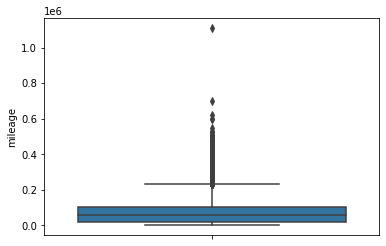

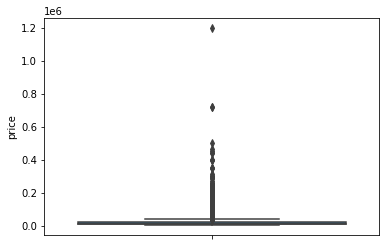

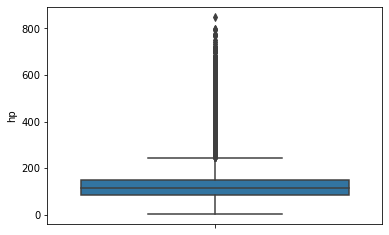

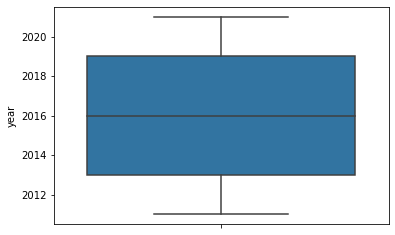

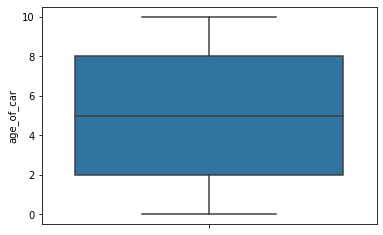

In [45]:
plot_outliers(data_num)

In [46]:
# According to the boxplot there are a few outliers in mileage and price columns.

In [47]:
def cleaning_outliers(name,column,lower=0.01,upper=0.99):
    lower_limit,upper_limit=name[column].quantile([lower,upper])
    name=name[(name[column]>lower_limit)&(name[column]<upper_limit)]
    return name

In [48]:
data=cleaning_outliers(data,'price',0.01,0.99)

In [49]:
data=cleaning_outliers(data,'mileage')

In [50]:
data.shape

(42210, 10)

In [51]:
#checking the multicollinearity 

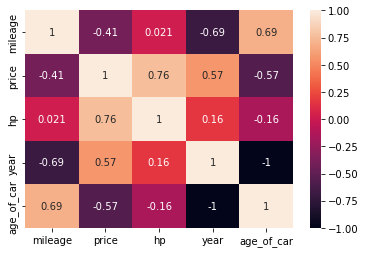

In [52]:
correlations_matrix = data.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [53]:
# In terms of the correlation matrix there is strong correaltion between year and age_of_car. Therefore i decide to drop the year column and keep the rest of columns.

In [54]:
data=data.drop('year',axis=1)

In [55]:
data.head()

,mileage,manufacturer,fuel,gear,offer_type,price,hp,age_of_car,place_of_origin
0,235000,BMW,Diesel,Manual,Used,6800,116.0,10,Germany
1,92800,Volkswagen,Gasoline,Manual,Used,6877,122.0,10,Germany
2,149300,SEAT,Gasoline,Manual,Used,6900,160.0,10,others
3,96200,Renault,Gasoline,Manual,Used,6950,110.0,10,others
4,156000,Peugeot,Gasoline,Manual,Used,6950,156.0,10,others


In [56]:
#reclassifying each column

In [57]:
for i in data.columns:
    print(data[i].value_counts())

10        943
50        290
20        283
100       201
100000    194
         ... 
107003      1
171220      1
184177      1
97920       1
837         1
Name: mileage, Length: 19517, dtype: int64
Volkswagen    6530
Opel          4498
Ford          4151
Skoda         2653
Renault       2545
              ... 
FISKER           1
9ff              1
Zhidou           1
Isuzu            1
Aixam            1
Name: manufacturer, Length: 65, dtype: int64
Gasoline             26241
Diesel               14087
Electric/Gasoline      944
Electric               620
CNG                    104
LPG                     99
Electric/Diesel         48
Others                  45
-/- (Fuel)              20
Hydrogen                 1
Ethanol                  1
Name: fuel, dtype: int64
Manual            27789
Automatic         14370
Semi-automatic       51
Name: gear, dtype: int64
Used              37384
Demonstration      2031
Pre-registered     1735
Employee's car     1060
Name: offer_type, dtype: int64
799

In [58]:
data['manufacturer'].value_counts()[15]

880

In [59]:
def select_object(d_name,col_name,number):
    list1=[]
    for i in range(len(d_name[col_name].value_counts())):
        if d_name[col_name].value_counts()[i]>number:
            list1.append(d_name[col_name].value_counts().index[i])
    return list1

In [60]:
list_name=select_object(data,'manufacturer',1500)

In [61]:
list_name

['Volkswagen',
 'Opel',
 'Ford',
 'Skoda',
 'Renault',
 'Audi',
 'BMW',
 'Mercedes-Benz',
 'SEAT',
 'Hyundai']

In [62]:
data['manufacturer']=np.where(data['manufacturer'].isin(list_name),data['manufacturer'],'other')

In [63]:
data['manufacturer'].value_counts()# maybe it is not right

other            11598
Volkswagen        6530
Opel              4498
Ford              4151
Skoda             2653
Renault           2545
Audi              2439
BMW               2293
Mercedes-Benz     2088
SEAT              1779
Hyundai           1636
Name: manufacturer, dtype: int64

In [64]:
data['fuel']=np.where(data['fuel'].isin(['Gasoline','Diesel','Electric/Gasoline','Electric']),data['fuel'],'other')

In [65]:
data['fuel'].value_counts()

Gasoline             26241
Diesel               14087
Electric/Gasoline      944
Electric               620
other                  318
Name: fuel, dtype: int64

In [66]:
# spliting the x and y and normalizing the data

In [67]:
model=data.reset_index(drop=True).copy()

In [68]:
y=model['price']
X=model.drop('price',axis=1)

In [69]:
X.head()

,mileage,manufacturer,fuel,gear,offer_type,hp,age_of_car,place_of_origin
0,235000,BMW,Diesel,Manual,Used,116.0,10,Germany
1,92800,Volkswagen,Gasoline,Manual,Used,122.0,10,Germany
2,149300,SEAT,Gasoline,Manual,Used,160.0,10,others
3,96200,Renault,Gasoline,Manual,Used,110.0,10,others
4,156000,other,Gasoline,Manual,Used,156.0,10,others


In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape

(33768, 8)

In [72]:
X_train_num=X_train.select_dtypes(np.number)
X_train_cat=X_train.select_dtypes(object)

X_test_num=X_test.select_dtypes(np.number)
X_test_cat=X_test.select_dtypes(object)

In [73]:
# scaling the numerical data

In [74]:
from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler().fit(X_train_num)
X_norm = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_norm, columns=X_train_num.columns)
X_train_norm.head()

X_test_norm=pd.DataFrame(transformer.transform(X_test_num),columns=X_test_num.columns)
X_test_norm.head()

,mileage,hp,age_of_car
0,0.140736,0.175097,0.4
1,0.641161,0.210117,0.9
2,0.376228,0.180285,1.0
3,0.241628,0.115435,1.0
4,0.157614,0.156939,0.4


In [75]:
# encoding the categorical data

In [76]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(X_train_cat)
encoded_for_p1 = encoder.transform(X_train_cat).toarray()
cols = encoder.get_feature_names(input_features=X_train_cat.columns)
X_train_cat_encoded = pd.DataFrame(encoded_for_p1, columns=cols)
X_train_cat_encoded.head()

encoded_for_p2 = encoder.transform(X_test_cat).toarray()
cols1 = encoder.get_feature_names(input_features=X_test_cat.columns)
X_test_cat_encoded = pd.DataFrame(encoded_for_p2, columns=cols1)
X_test_cat_encoded.head()

D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,manufacturer_BMW,manufacturer_Ford,manufacturer_Hyundai,manufacturer_Mercedes-Benz,manufacturer_Opel,manufacturer_Renault,manufacturer_SEAT,manufacturer_Skoda,manufacturer_Volkswagen,manufacturer_other,fuel_Electric,fuel_Electric/Gasoline,fuel_Gasoline,fuel_other,gear_Manual,gear_Semi-automatic,offer_type_Employee's car,offer_type_Pre-registered,offer_type_Used,place_of_origin_others
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [77]:
X_train_transformed=pd.concat([X_train_cat_encoded,X_train_norm],axis=1)
X_test_transformed=pd.concat([X_test_cat_encoded,X_test_norm],axis=1)

In [78]:
y_train = y_train.reset_index(drop=True) 
y_test = y_test.reset_index(drop=True) 

In [79]:
# creating models

In [80]:
from sklearn import linear_model

lm = linear_model.LinearRegression()
lm.fit(X_train_transformed,y_train)


LinearRegression()

In [81]:
from sklearn.metrics import r2_score
predictions_train = lm.predict(X_train_transformed)
print('R2 score for the training set is:', r2_score(y_train, predictions_train))

R2 score for the training set is: 0.847722384091738


In [82]:
predictions_test=lm.predict(X_test_transformed)
print('R2 score for the testing set is:', r2_score(y_test, predictions_test))

R2 score for the testing set is: 0.8509800827624887


In [83]:
# creating a new column named price interval
data.describe()

,mileage,price,hp,age_of_car
count,42210.000000,42210.000000,42210.000000,42210.000000
mean,70232.498910,15465.284293,130.576688,5.072305
std,56098.007406,12081.585468,65.558998,3.065867
min,8.000000,3303.000000,1.000000,0.000000
25%,22500.000000,7500.000000,86.000000,2.000000
50%,61082.000000,10990.000000,116.000000,5.000000
75%,104000.000000,19000.000000,150.000000,8.000000
max,257809.000000,83770.000000,772.000000,10.000000


In [84]:
data=data.reset_index(drop=True)

In [85]:
price_labels = ['Low', 'Moderate', 'High']
data['price_category_userdef'] = pd.cut(data['price'],[0,10000,20000,100000],labels=price_labels)
data[['price_category_userdef']].value_counts()

price_category_userdef
Low                       19001
Moderate                  13486
High                       9723
dtype: int64

In [86]:
data['price_category_userdef'].value_counts()

Low         19001
Moderate    13486
High         9723
Name: price_category_userdef, dtype: int64

In [87]:
import scipy.stats as st

In [88]:
data_crosstab = pd.crosstab(data['manufacturer'], data['place_of_origin'], margins=False)
data_crosstab

place_of_origin,Germany,others
manufacturer,,
Audi,2439,0
BMW,2293,0
Ford,0,4151
Hyundai,0,1636
Mercedes-Benz,2088,0
Opel,4498,0
Renault,0,2545
SEAT,0,1779
Skoda,0,2653


In [89]:
# H0  manufacturer and place_of_origin are not related
st.chi2_contingency(data_crosstab)[1]
# p<0.05,H0 can be rejected which means manufacturer and place_of_origin are related, so i need to drop one of them.

0.0

In [90]:
data_low=data

In [91]:
data_low=data_low[(data_low['price_category_userdef'].isin(['Low']))]
data_low=data_low.drop('manufacturer',axis=1)

In [92]:
data_low['price_category_userdef'].value_counts()

Low         19001
Moderate        0
High            0
Name: price_category_userdef, dtype: int64

In [93]:
# My target column is place_of_origin.

In [94]:
data_low['place_of_origin'].value_counts()

others     11682
Germany     7319
Name: place_of_origin, dtype: int64

In [95]:
#data_low['price_category_userdef']=data_low['price_category_userdef'].astype('object')

In [96]:
data_low.dtypes

mileage                      int64
fuel                        object
gear                        object
offer_type                  object
price                        int64
hp                         float64
age_of_car                   int64
place_of_origin             object
price_category_userdef    category
dtype: object

In [97]:
# Target column is imbalanced so i need to use SMOTE.

In [98]:
from imblearn.over_sampling import SMOTE

In [99]:
X = data_low.drop('place_of_origin',axis = 1)
y = data_low['place_of_origin']

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [101]:
X_train_num=X_train.select_dtypes(np.number)
X_train_cat=X_train.select_dtypes(object)

X_test_num=X_test.select_dtypes(np.number)
X_test_cat=X_test.select_dtypes(object)

In [102]:
X_train_cat.head()

,fuel,gear,offer_type
31277,Diesel,Automatic,Used
3160,Diesel,Manual,Used
6132,Diesel,Manual,Used
1441,Diesel,Manual,Used
17724,Gasoline,Manual,Used


In [103]:
X_train_num.head()

,mileage,price,hp,age_of_car
31277,199485,6500,170.0,10
3160,121000,9999,140.0,7
6132,185500,8490,110.0,6
1441,120000,7490,110.0,6
17724,49900,6690,60.0,4


In [104]:
transformer = MinMaxScaler().fit(X_train_num)
X_train_scaled = pd.DataFrame(transformer.transform(X_train_num),columns=X_train_num.columns)
X_test_scaled = pd.DataFrame(transformer.transform(X_test_num),columns=X_test_num.columns)


In [105]:
X_train_scaled.head()

,mileage,price,hp,age_of_car
0,0.774690,0.477378,0.521605,1.0
1,0.469882,0.999851,0.429012,0.7
2,0.720377,0.774526,0.336420,0.6
3,0.465999,0.625205,0.336420,0.6
4,0.193755,0.505749,0.182099,0.4


In [106]:
encoder = OneHotEncoder(drop='first').fit(X_train_cat)
cols = encoder.get_feature_names(input_features=X_train_cat.columns)
X_train_cat_scaled = pd.DataFrame(encoder.transform(X_train_cat).toarray(), columns=cols)
X_train_cat_scaled.head()


cols1 = encoder.get_feature_names(input_features=X_test_cat.columns)
X_test_cat_scaled = pd.DataFrame(encoder.transform(X_test_cat).toarray(), columns=cols1)


D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [107]:
X_train_transformed=pd.concat([X_train_cat_scaled,X_train_scaled],axis=1)
X_test_transformed=pd.concat([X_test_cat_scaled,X_test_scaled],axis=1)

In [108]:
y_train = y_train.reset_index(drop=True) 
y_test = y_test.reset_index(drop=True) 

In [109]:
y_train.value_counts()

others     8756
Germany    5494
Name: place_of_origin, dtype: int64

In [110]:
sm = SMOTE(random_state=100, k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_transformed,y_train)

In [111]:
y_train_SMOTE.value_counts()

Germany    8756
others     8756
Name: place_of_origin, dtype: int64

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_SMOTE, y_train_SMOTE)
pred = LR.predict(X_test_transformed)

print("precision: ",precision_score(y_test,pred,pos_label='others'))
print("recall: ",recall_score(y_test,pred,pos_label='others'))
print("f1: ",f1_score(y_test,pred,pos_label='others'))

precision:  0.6992046276211136
recall:  0.6609706083390294
f1:  0.6795502459592412


In [113]:
# Hypothesis testing

In [114]:
# alpha=0.05
# H0: mean hp of german cars is lower than the others when the price is lower than 10000
# H1: mean hp of german cars is higher than the others when the price is lower than 10000
from scipy import stats
hp_german=data_low[(data_low['place_of_origin']=='Germany')]['hp']
hp_others=data_low[(data_low['place_of_origin']=='others')]['hp']

In [115]:
data_low.head()

,mileage,fuel,gear,offer_type,price,hp,age_of_car,place_of_origin,price_category_userdef
0,235000,Diesel,Manual,Used,6800,116.0,10,Germany,Low
1,92800,Gasoline,Manual,Used,6877,122.0,10,Germany,Low
2,149300,Gasoline,Manual,Used,6900,160.0,10,others,Low
3,96200,Gasoline,Manual,Used,6950,110.0,10,others,Low
4,156000,Gasoline,Manual,Used,6950,156.0,10,others,Low


In [116]:
tstat, pval = stats.ttest_ind(hp_german, hp_others)

In [117]:
print(tstat)
pval

18.727065066214138


1.4871672848800772e-77

In [118]:
#pval<0.05 that means H0  can be rejected. The mean hp of german cars is higher than the others.

In [119]:
# H0: mean price of german cars is lower than the others when the price is lower than 10000
# H1: mean price of german cars is higher than the others when the price is lower than 10000

In [120]:
price_german=data_low[(data_low['place_of_origin']=='Germany')]['price']
price_others=data_low[(data_low['place_of_origin']=='others')]['price']


In [121]:
tstat, pval = stats.ttest_ind(price_german, price_others)
print(tstat,pval)

18.119722233364794 9.130361568951072e-73


In [122]:
# p<0.05 means the price of german cars is a little bit higher than the others.

In [123]:
# Consider the case where the price is between 10000 and 20000

In [124]:
data_moderate=data

In [125]:
data_moderate=data_moderate[(data_moderate['price_category_userdef'].isin(['Moderate']))]

In [126]:
data_moderate['price_category_userdef'].value_counts()

Moderate    13486
Low             0
High            0
Name: price_category_userdef, dtype: int64

In [127]:
# alpha=0.05
# H0: mean hp of german cars is lower than the others when the price is between 10000 and 20000
# H1: mean hp of german cars is higher than the others when the price is between 10000 and 20000
hp_german=data_moderate[(data_moderate['place_of_origin']=='Germany')]['hp']
hp_others=data_moderate[(data_moderate['place_of_origin']=='others')]['hp']

In [128]:
tstat, pval = stats.ttest_ind(hp_german, hp_others)
print(tstat)
pval

29.632264697300812


5.29468256039115e-187

In [129]:
#pval<0.05 means mean hp of german cars is higher than the others.

In [130]:
# H0: mean price of german cars is lower than the others when the price is between 10000 and 20000
# H1: mean price of german cars is higher than the others when the price is between 10000 and 20000
price_german=data_moderate[(data_moderate['place_of_origin']=='Germany')]['price']
price_others=data_moderate[(data_moderate['place_of_origin']=='others')]['price']
tstat, pval = stats.ttest_ind(price_german, price_others)
print(tstat,pval)

-1.0062614293121375 0.31430788590533776


In [131]:
#pval>0.05 means that the price of german cars is lower than the others.

In [132]:
# Consider the case where the price is above 20000

In [133]:
data_high=data

In [134]:
data_high=data_high[(data_high['price_category_userdef'].isin(['High']))]

In [135]:
# alpha=0.05
# H0: mean hp of german cars is lower than the others when the price above 20000
# H1: mean hp of german cars is higher than the others when the price is above 20000
hp_german=data_high[(data_high['place_of_origin']=='Germany')]['hp']
hp_others=data_high[(data_high['place_of_origin']=='others')]['hp']
tstat, pval = stats.ttest_ind(hp_german, hp_others)
print(tstat)
pval

16.456532691765595


4.8635765969302816e-60

In [136]:
# H0: mean price of german cars is lower than the others when the price is above 20000
# H1: mean price of german cars is higher than the others when the price is above 20000
price_german=data_high[(data_high['place_of_origin']=='Germany')]['price']
price_others=data_high[(data_high['place_of_origin']=='others')]['price']
tstat, pval = stats.ttest_ind(price_german, price_others)
print(tstat,pval)

16.76732377441806 3.153686495017977e-62


In [137]:
# p values of both hypothesis are lower than 0.05 that means the mean hp of german cars is higher than the others meanwhile the price is higher. 

In [143]:
# alpha=0.05
# H0: mean mileage of german cars is lower than the others
# H1: mean mileage of german cars is higher than the others
mil_german=data[(data['place_of_origin']=='Germany')]['mileage']
mil_others=data[(data['place_of_origin']=='others')]['mileage']
tstat, pval = stats.ttest_ind(mil_german, mil_others)
print(tstat)
pval

30.70433924723036


9.013742451832508e-205

In [140]:
# p value is lower than 0.05 which mean mileage of german cars is higher than the others.

(19464,)

In [144]:
# alpha=0.05
# H0: mean age of german cars is lower than the others
# H1: mean age of german cars is higher than the others
age_german=data[(data['place_of_origin']=='Germany')]['age_of_car']
age_others=data[(data['place_of_origin']=='others')]['age_of_car']
tstat, pval = stats.ttest_ind(age_german,age_others)
print(tstat)
pval

14.070323864281226


7.302604723535131e-45

In [142]:
# p value is lower than 0.05 that means mean age of german cars is higher than the others.

0     10
1     10
7     10
10    10
11    10
Name: age_of_car, dtype: int64

In [ ]:
# Conclusion:
# German cars is cost-effective and value-maintaining.